### 1. 載入 Churn_Modelling.csv 資料集，並印出哪些欄位含有遺漏值(missing value)。

#### 1.1 Gender、Age、EstimatedSalary 各有 4、6、4 筆缺失值

In [116]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
df.isna().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

### 2. 以平均值填入 EstimatedSalary 的遺漏值，以眾數填入 Age 與 Gender的遺漏值。

#### 2.1 按照題義填補缺失值

In [117]:
df['Age'].mode()

0    37.0
dtype: float64

In [118]:
df['Gender'].mode()

0    Male
dtype: object

In [119]:
# 填入眾數
df['Gender'] = df['Gender'].fillna('Male')
df['Age'] = df['Age'].fillna(37)
# 填入平均數
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())

#### 2.2 檢查是否還有缺失值

In [120]:
# 檢查缺失值
df.isna().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

### 3. 修改欄位名稱，將 CredRate 改成 CreditScore、ActMem 改成 IsActiveMember、Prod Number 改成 NumOfProducts、Exited 改成 Churn，以利後續分析資料。 

#### 3.1 重新命名欄位

In [121]:
df.rename(columns = {'CredRate':'CreditScore',
                     'ActMem':'IsActiveMember',
                     'Prod Number':'NumOfProducts',
                     'Exited':'Churn'}, inplace = True)

#### 3.2 檢查重新命名後的結果

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Churn            10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


### 4. 去除 CustomerId,欄位，並將Geography、Gender、HasCrCard、Churn、IsActiveMember 修改資料型態為 category，印出所有欄位的資料型態，並存成新的 CSV 檔 (設定index=False)。

#### 4.1 去除 CustomerId 欄位

In [123]:
df = df.drop(['CustomerId'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churn            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


#### 4.2 將Geography、Gender、HasCrCard、Churn、IsActiveMember 修改資料型態為 category

In [124]:
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['Churn'] = df['Churn'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')

#### 4.3 印出所有欄位的資料型態，並存成新的 CSV 檔 (index=False)

In [125]:
df.info()
df.to_csv('Churn_Modelling_Modified.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  float64 
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Churn            10000 non-null  category
dtypes: category(5), float64(3), int64(3)
memory usage: 518.3 KB


### 5. 對各個欄位進行分析，了解目前銀行客戶的概況：

#### 5.1 對 HasCrCard 欄位進行分析，說明有多少比例的人持有信用卡，多少比例的人不持有信用卡

In [126]:
# 查看有多少人有/沒有卡
print(df.groupby('HasCrCard').size())
# 計算持卡比例
print("有持卡的比例: "+str(705500/10000)+'%')
print("沒有持卡的比例: "+str(294500/10000)+'%')

HasCrCard
0    2945
1    7055
dtype: int64
有持卡的比例: 70.55%
沒有持卡的比例: 29.45%


#### 5.2 對 Churn 欄位進行分析，說明有多少比例的客戶流失

In [127]:
# 查看有多少人流失
print(df.groupby('Churn').size())
# 計算持卡比例
print("流失的比例: "+str(203700/10000)+'%')

Churn
0    7963
1    2037
dtype: int64
流失的比例: 20.37%


#### 5.3 對 IsActiveMember 欄位進行分析，說明有多少比例的客戶仍是活躍狀態

In [128]:
# 查看有多少人流失
print(df.groupby('IsActiveMember').size())
# 計算持卡比例
print("活躍用戶的比例: "+str(515100/10000)+'%')

IsActiveMember
0    4849
1    5151
dtype: int64
活躍用戶的比例: 51.51%


#### 5.4 對 Churn 進行分析，觀察流失客戶跟未流失客戶的資料平均值

In [129]:
print("未流失客戶的資料平均值:")
print(df[df['Churn']==0].mean())
print('='*30)
print("流失客戶的資料平均值:")
print(df[df['Churn']==1].mean())

未流失客戶的資料平均值:
CreditScore          651.853196
Age                   37.411277
Tenure                 5.033279
Balance            72745.296779
NumOfProducts          1.544267
EstimatedSalary    99718.932023
dtype: float64
流失客戶的資料平均值:
CreditScore           645.351497
Age                    44.837997
Tenure                  4.932744
Balance             91108.539337
NumOfProducts           1.475209
EstimatedSalary    101465.677531
dtype: float64


#### 5.5 計算屬性間的相關係數，並用 seaborn 繪製出熱力圖 (heatmap)

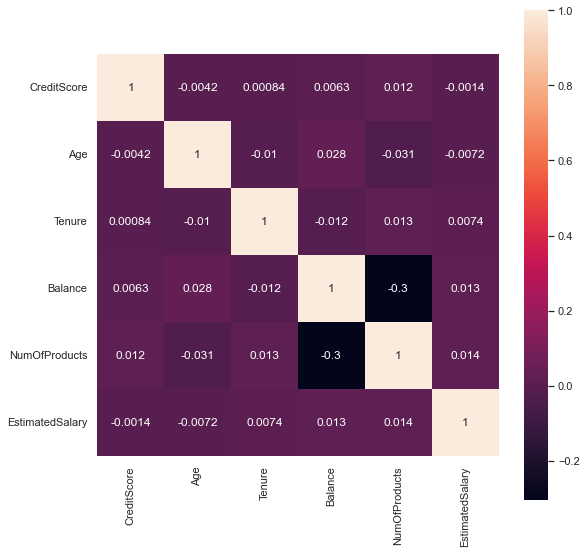

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
def test(df):
    dfData = df.corr()
    plt.subplots(figsize=(9, 9)) # 設定畫面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True)
    plt.savefig('./BluesStateRelation.png')
    plt.show()
test(df)

### 6. 運用資料視覺化來幫助分析：

#### 6.1 繪出 Gender 與 Churn 的數量關係，分析不同性別於客戶流失的關係

Text(0.5, 1.0, 'Customer Churn Distribution By Gender')

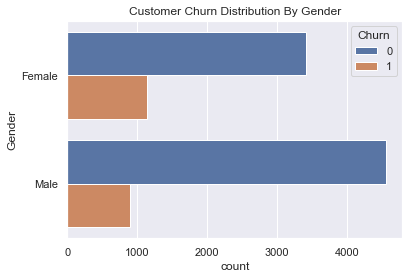

In [131]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Gender", hue="Churn", data=df)
ax.set_title("Customer Churn Distribution By Gender")

#### 6.2 繪出 Geography 與 Churn 的數量關係，分析不同地區於客戶流失的關係

Text(0.5, 1.0, 'Customer Churn Distribution By Geography')

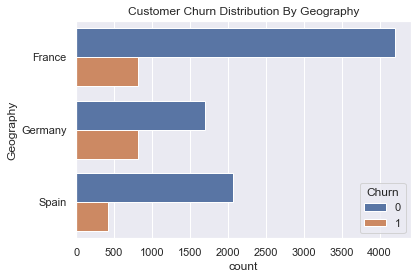

In [132]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Geography", hue="Churn", data=df)
ax.set_title("Customer Churn Distribution By Geography")

#### 6.3 繪出 Age 分布與 Churn 的關係，分析不同年齡於客戶流失率的關係

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

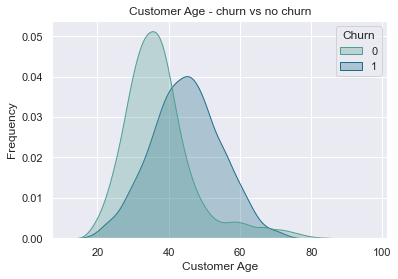

In [133]:
ax2 = sns.kdeplot(
   data=df, x="Age", hue="Churn",
   fill=True, common_norm=False, palette="crest",
   alpha=.3, linewidth=1,
)

ax2.set_ylabel('Frequency')
ax2.set_xlabel('Customer Age')
ax2.set_title('Customer Age - churn vs no churn')

#### 6.4 繪出 CreditScore 與 Churn 的關係，分析客戶信用分數於客戶流失率的關係

Text(0.5, 1.0, 'Customer CreditScore - churn vs no churn')

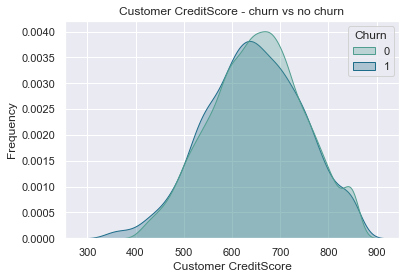

In [134]:
ax2 = sns.kdeplot(
   data=df, x="CreditScore", hue="Churn",
   fill=True, common_norm=False, palette="crest",
   alpha=.3, linewidth=1,
)

ax2.set_ylabel('Frequency')
ax2.set_xlabel('Customer CreditScore')
ax2.set_title('Customer CreditScore - churn vs no churn')